<a href="https://colab.research.google.com/github/sjhd1109/study/blob/main/credit_modeling_210306_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## credit modeling
- 로지스틱
- 케라스

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive') # 새로운 창에서 key 를 받아서 입력해야합니다.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = '/content/sample_data/gmtrain_df.csv'
test = '/content/sample_data/gmtest_df.csv'

In [ ]:
train_df = pd.read_csv(train)
test_df = pd.read_csv(test)

train_df

,goodbad,checking,duration,history,purpose,amount,savings,employed,installp,martial,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign
0,0,4,1,5,4,1,1,3,1,2,1,1,3,3,3,2,2,3,1,2,1
1,0,4,2,3,1,1,1,3,3,4,1,2,1,2,3,2,2,3,1,2,1
2,0,1,3,3,1,3,2,4,4,3,1,3,3,3,3,2,1,4,2,2,1
3,1,1,4,5,7,4,1,3,4,3,1,3,4,2,1,2,1,3,1,2,1
4,0,2,3,3,2,4,1,2,2,3,1,3,3,3,3,2,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,1,3,3,2,4,1,1,4,3,1,2,4,3,3,3,1,4,1,2,1
696,0,2,3,5,4,2,1,5,4,3,1,2,2,5,3,2,2,2,1,1,1
697,0,4,2,5,7,3,5,2,2,3,1,1,2,5,3,2,2,2,2,1,1
698,0,1,4,3,3,3,1,1,4,3,1,3,2,3,3,2,1,4,1,2,1


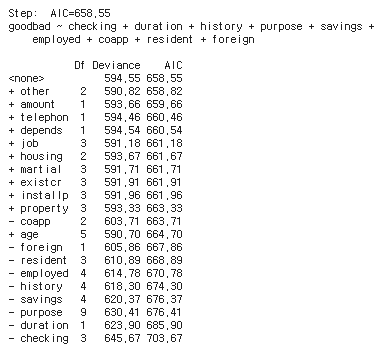

In [ ]:
x_train = train_df[['checking',	'duration', 'history'	,'purpose',	'savings'	,'employed',	'coapp',	'resident','foreign']]
y_train = train_df['goodbad']

x_test = test_df[['checking',	'duration', 'history'	,'purpose',	'savings'	,'employed',	'coapp',	'resident','foreign']]
y_test = test_df['goodbad']


x_train

,checking,duration,history,purpose,savings,employed,coapp,resident,foreign
0,4,1,5,4,1,3,1,1,1
1,4,2,3,1,1,3,1,2,1
2,1,3,3,1,2,4,1,3,1
3,1,4,5,7,1,3,1,3,1
4,2,3,3,2,1,2,1,3,1
...,...,...,...,...,...,...,...,...,...
695,1,3,3,2,1,1,1,2,1
696,2,3,5,4,1,5,1,2,1
697,4,2,5,7,5,2,1,1,1
698,1,4,3,3,1,1,1,3,1


In [ ]:
model1 = sm.Logit(y_train, x_train)
results = model1.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.490171
         Iterations 6


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Fri, 26 Mar 2021   Pseudo R-squ.:                  0.1976
Time:                        15:08:39   Log-Likelihood:                -343.12
converged:                       True   LL-Null:                       -427.61
Covariance Type:            nonrobust   LLR p-value:                 2.120e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
checking      -0.4948      0.081     -6.105      0.000      -0.654      -0.336
duration       0.6720      0.093      7.217      0.000       0.490       0.855
history       -0.2830      0.087     -3.265      0.001      -0.453      -0.113
purpose       -0.0118      0.039     -0.306      0.760      -0.087       0.064
savings       -0.2682      0.069     -3.875      0.000      -0.404      -0.133
employed      -0.1493      0.081     -1.837      0.066      -0.309       0.010
coapp         -0.1987      0.206     -0.966      0.334      -0.602       0.205
resident       0.1786      0.085      2.113      0.035       0.013       0.344
foreign        0.1357      0.384      0.353      0.724      -0.618       0.889
==============================================================================
"""

In [ ]:
results.params

checking   -0.494760
duration    0.672038
history    -0.283048
purpose    -0.011788
savings    -0.268196
employed   -0.149283
coapp      -0.198719
resident    0.178565
foreign     0.135652
dtype: float64

In [ ]:
np.exp(results.params)

checking    0.609717
duration    1.958224
history     0.753483
purpose     0.988281
savings     0.764758
employed    0.861325
coapp       0.819780
resident    1.195500
foreign     1.145283
dtype: float64

In [ ]:
#y_hat 예측
pred_y = results.predict(x_test)
pred_y

0      0.184109
1      0.637906
2      0.102854
3      0.417756
4      0.050589
         ...   
295    0.454566
296    0.047850
297    0.300544
298    0.172824
299    0.870375
Length: 300, dtype: float64

In [ ]:
# 임계값 함수

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 함.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.5)
pred_Y

0      0
1      1
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    1
Length: 300, dtype: int64

In [ ]:
# confusion matrix (분류 표를 나타낸 행렬)

cfmat = confusion_matrix(y_test, pred_Y)
print(cfmat)

[[194  16]
 [ 60  30]]


In [ ]:
print(confusion_matrix(y_test, pred_Y))
print()
print(classification_report(y_test, pred_Y))

[[194  16]
 [ 60  30]]

              precision    recall  f1-score   support

           0       0.76      0.92      0.84       210
           1       0.65      0.33      0.44        90

    accuracy                           0.75       300
   macro avg       0.71      0.63      0.64       300
weighted avg       0.73      0.75      0.72       300



In [ ]:
# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
	return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.7466666666666667

In [ ]:
# 임계값 0~1에 따른 정확도 확인

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
	pred_Y = cut_off(pred_y,i)
	cfmat = confusion_matrix(y_test,pred_Y)
	table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.300000
0.1,0.426667
0.2,0.613333
0.3,0.703333
0.4,0.740000
0.5,0.746667
0.6,0.750000
0.7,0.720000
0.8,0.713333


AUC: 0.747063492063492


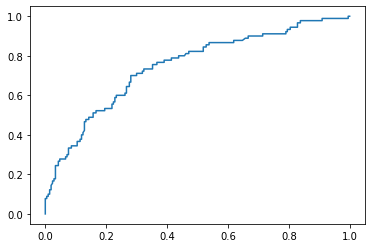

In [ ]:
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(y_test,pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

##케라스

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras import regularizers
from keras import optimizers
from keras.layers import Dense, Dropout
from pandas.api.types import is_string_dtype
import tensorflow as tf
import plotly.graph_objs as go
## seaborn
import seaborn as sns
sns.set_context('paper', rc={'font.size':12,'axes.titlesize':14,'axes.labelsize':12})
sns.set_style('white')

In [ ]:
#원핫인코딩_train_df
dataset = train_df.values
X = dataset[:,1:21].astype('float')  #df 에서 goodbad 제외
y_obj = dataset[:,0]   #target 

e=LabelEncoder()
e.fit(y_obj)
y=e.transform(y_obj)
y_encoded=tf.keras.utils.to_categorical(y)
y_encoded[:21]



#원핫인코딩_test_df
dataset1 = test_df.values
test_X = dataset1[:,1:21].astype('float')  #df 에서 goodbad 제외
y_obj1 = dataset1[:,0]   #target 

e1=LabelEncoder()
e1.fit(y_obj1)
y1=e1.transform(y_obj1)
test_Y=tf.keras.utils.to_categorical(y1)
test_Y[:21]

In [ ]:
train_X, val_X, train_Y, val_Y = train_test_split(X, y_encoded, test_size=0.8, random_state=0)

In [ ]:
model = Sequential()

# 옵티마이저는 경사하강법 sgd를 사용
sgd = optimizers.SGD(lr=0.03, decay=0, momentum=0.9, nesterov=False)
model.add(Dense(18, input_dim=train_X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy','mae', 'mse'])

In [ ]:
history=model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=30, batch_size=5)

Epoch 1/30
28/28 [==============================] - 0s 9ms/step - loss: 0.3287 - accuracy: 0.8857 - mae: 0.2193 - mse: 0.1052 - val_loss: 0.7220 - val_accuracy: 0.6696 - val_mae: 0.3735 - val_mse: 0.2338
Epoch 2/30
28/28 [==============================] - 0s 6ms/step - loss: 0.3533 - accuracy: 0.8214 - mae: 0.2354 - mse: 0.1157 - val_loss: 0.6092 - val_accuracy: 0.7304 - val_mae: 0.3295 - val_mse: 0.1940
Epoch 3/30
28/28 [==============================] - 0s 7ms/step - loss: 0.3114 - accuracy: 0.8500 - mae: 0.2220 - mse: 0.0979 - val_loss: 0.5871 - val_accuracy: 0.7536 - val_mae: 0.3045 - val_mse: 0.1809
Epoch 4/30
28/28 [==============================] - 0s 7ms/step - loss: 0.3431 - accuracy: 0.8429 - mae: 0.2234 - mse: 0.1112 - val_loss: 0.5978 - val_accuracy: 0.7536 - val_mae: 0.2956 - val_mse: 0.1816
Epoch 5/30
28/28 [==============================] - 0s 7ms/step - loss: 0.3369 - accuracy: 0.8571 - mae: 0.2212 - mse: 0.1075 - val_loss: 0.6260 - val_accuracy: 0.7179 - val_mae: 0.336

In [ ]:
Y_predict = model.predict(test_X)
score1 = model.evaluate(test_X, test_Y) 

10/10 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7400 - mae: 0.2991 - mse: 0.1846


In [ ]:
print("정확도 결과는 : {} %".format(np.round(model.evaluate(test_X, test_Y)[1],3)))
score1 = pd.DataFrame(score1, index = model.metrics_names).T
history = pd.DataFrame(history.history)
display(score1.style.hide_index())

10/10 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7400 - mae: 0.2991 - mse: 0.1846
정확도 결과는 : 0.74 %


loss,accuracy,mae,mse
0.589226,0.740000,0.299066,0.184569


In [ ]:
Y_predict1=np.argmax(Y_predict, axis=1)
Y_predict1[1]

round_y_test=np.argmax(test_Y, axis=1)
round_y_test[1]

1

In [ ]:
print(confusion_matrix(round_y_test, Y_predict1))
print()
print(classification_report(round_y_test, Y_predict1))

[[180  30]
 [ 48  42]]

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       210
           1       0.58      0.47      0.52        90

    accuracy                           0.74       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.73      0.74      0.73       300



precision(정밀도) : 0(정상)이라고 예측한 데이터의 79%만 실제로 정상이었고 1(부도)이라고 예측한 데이터의 58%만 실제로 부도이었음을 알 수 있다. 

recall(재현율) : 또한 실제 0(정상)인 데이터 중의 86%만 정상으로 판별되었고 실제 1(부도)인 데이터 중의 47%만 1(부도)로 판별되었음을 알 수 있다.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= history.index.values, y= history['loss'].values, line=dict(color='OrangeRed', width= 1.5), 
                         name = 'Loss'))
fig.add_trace(go.Scatter(x= history.index.values, y= history['accuracy'].values, line=dict(color='MidnightBlue', width= 1.5), 
                         name = 'Accuracy'))
fig.add_trace(go.Scatter(x= history.index.values, y= history['mae'].values, line=dict(color='ForestGreen', width= 1.5), 
                         name = 'Mean Absolute Error (MAE)'))
fig.add_trace(go.Scatter(x= history.index.values, y= history['mse'].values, line=dict(color='purple', width= 1.5), 
                         name = 'Mean Squared Error (MSE)'))
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=12))
fig.update_layout(dragmode='select', plot_bgcolor= 'white', height=600, hovermode='closest')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Lightgray')
fig.update_xaxes(showline=True, linewidth=1, linecolor='Lightgray', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='Lightgray', mirror=True)
fig['layout']['xaxis'].update(range=[0, history.index.values.max()])
fig['layout']['yaxis'].update(range=[0, 1.0])
fig.show()

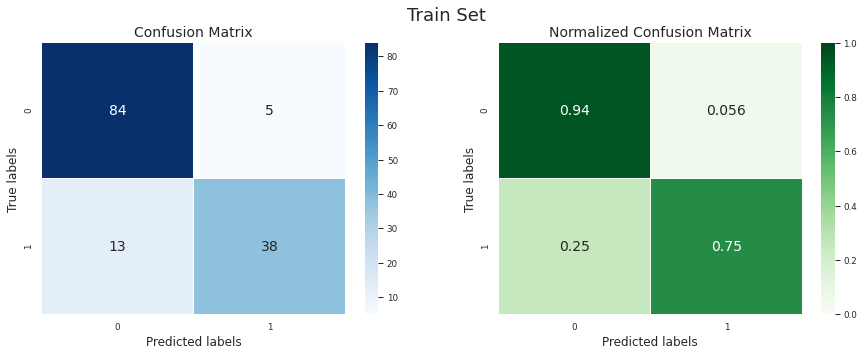

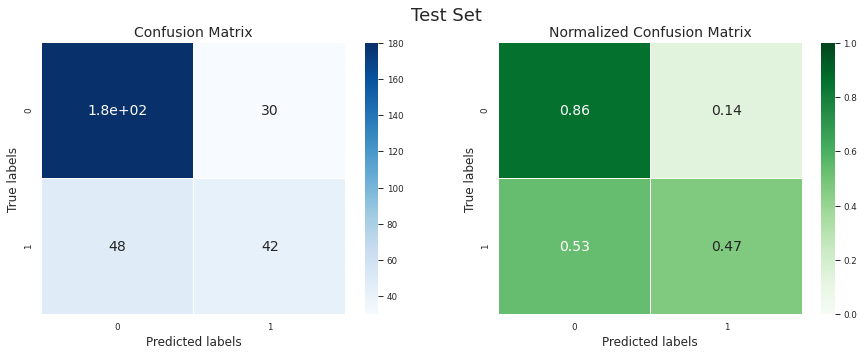

In [ ]:
# Train set
train_pred = model.predict(train_X)
Confusion_Matrix = confusion_matrix(train_Y.argmax(axis=1), train_pred.argmax(axis=1))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Train Set', fontsize = 18)
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Blues", ax = ax[0],
               linewidths = 0.2, cbar_kws={"shrink": 1})
_ = ax[0].set_xlabel('Predicted labels')
_ = ax[0].set_ylabel('True labels'); 
_ = ax[0].set_title('Confusion Matrix');
#_ = ax[0].xaxis.set_ticklabels(Labels)
#_ = ax[0].yaxis.set_ticklabels(Labels)

Confusion_Matrix = Confusion_Matrix.astype('float') / Confusion_Matrix.sum(axis=1)[:, np.newaxis]
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Greens", ax = ax[1],
               linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": 1})
_ = ax[1].set_xlabel('Predicted labels')
_ = ax[1].set_ylabel('True labels'); 
_ = ax[1].set_title('Normalized Confusion Matrix');
#_ = ax[1].xaxis.set_ticklabels(Labels)
#_ = ax[1].yaxis.set_ticklabels(Labels)

# Test set
Confusion_Matrix = confusion_matrix(test_Y.argmax(axis=1), Y_predict.argmax(axis=1))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Test Set', fontsize = 18)
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Blues", ax = ax[0],
                linewidths = 0.2, cbar_kws={"shrink": 1})
_ = ax[0].set_xlabel('Predicted labels')
_ = ax[0].set_ylabel('True labels'); 
_ = ax[0].set_title('Confusion Matrix');
#_ = ax[0].xaxis.set_ticklabels(Labels)
#_ = ax[0].yaxis.set_ticklabels(Labels)

Confusion_Matrix = Confusion_Matrix.astype('float') / Confusion_Matrix.sum(axis=1)[:, np.newaxis]
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Greens", ax = ax[1],
               linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": 1})
_ = ax[1].set_xlabel('Predicted labels')
_ = ax[1].set_ylabel('True labels'); 
_ = ax[1].set_title('Normalized Confusion Matrix');
#_ = ax[1].xaxis.set_ticklabels(Labels)
#_ = ax[1].yaxis.set_ticklabels(Labels)



## 3. Classification 문제 해결
- 클래스 불균형 (class imbalance) 문제


**(1) Class Imbalanced problem이란**
 - 클래스 불균형 문제는 다수 클래스(majority class)의 수가 소수 클래스(minority class)의 수보다 월등히 많은 학습상황에서 발생하며, 해당 상황에서 분류모델을 학습하면 분류성능이 저하되는 문제를 클래스 불균형 문제라고 한다.

 - 즉 주어진 테스트 데이터에 대해 overfitting 하여, 소수클래스에 해당하는 데이터를 잘 구분하지 못하는 현상이다.(즉 모델이 소수의 데이터를 무시하는 경향이 생기는 문제)

 - 이런 클래스 불균형 문제는 의료, 반도체, 보험, 텍스트 등 여러분야에 걸쳐서 발생하고 있는 문제이다.

 - 클래스 불균형 문제에 대한 지수를 IR(class imbalanced ratio) = # of majority class / # of minority class 라고 한다.

**(2) 왜 클래스 균형이 필요한가?**
 - 왜 데이터가 클래스 균형을 이루어야할까? 그리고 언제 클래스 균형이 필요할까? 핵심은 다음과 같다. 클래스 균형 클래스 균형은 소수의 클래스에 특별히 더 큰 관심이 있는 경우에 필요하다. 

 - 예를 들어 현재 재정 상황 및 집의 특성 등을 토대로 집을 사야할지 말아야할지를 예측하는 모델을 만들고 싶다고 하자. 사지말라고 예측하는 것과 사라고 예측하는 것은 그 무게가 다르다. 집을 사라고 예측하는 것은 훨씬 더 큰 리스크를 수반한다. 잘못된 투자는 큰 손실로 이루어질 수 있기 때문이다. 따라서 '집을 사라' 라고 예측하는 것에 대해서는 더 큰 정확도를 가져야한다. 하지만 데이터가 '집을 사지마라' 클래스에 몰려있는 경우, '집을 사지마라' 예측에 있어서는 높은 정확도를 가질 수 있어도 '집을 사라' 라고 예측하는 것에 관해서는 예측 성능이 좋지 않게 된다. 따라서 클래스 불균형이 있는 경우, 클래스에 따라 정확도가 달라지게 된다. 이를 해결하기 위해서는 따라서 '집을 사라' 클래스에는 더욱 큰 비중 (weight) 를 두고 정확한 예측을 할 수 있도록 만들어야한다.   

 - 만약 소수 클래스에 관심이 없다면 어떻게 할까? 예를 들어, 이미지 분류 문제를 예로 들어보자. 그리고 오직, 전체 예측의 정확도 (accuracy) 에만 관심이 있다고 하자. 이 경우에는 굳이 클래스 균형을 맞출 필요가 없다. 왜냐하면 트레이닝 데이터에 만에 데이터를 위주로 학습하면, 모델의 정확도가 높아질 것이기 때문이다. 따라서 이런 경우에는 소수 클래스를 무시하더라도 전체 성능에 큰 영향을 주지 않기 때문에, 클래스 균형을 맞추는 것이 굳이 필요하지 않다고 할 수 있다. 


**(3) Class Imbalanced problem이 발생했을 때 사용하는 모델성능 지표**
 - G-mean: 제1종 오류와 제2종 오류중 성능이 나쁜쪽에 더 가중치는 주는 지표
 - F1 measure: 불량에 관여하는 지표인 정밀도와 재현율만 고려하는 지표
 - 정밀도: precision, 옳게 분류된 불량 데이터 수/불량으로 예측한 데이터, 분류모형이 불량을 진단하기 위해 얼마나 잘 동작했는지 보여주는 지표
 - 재현율: recall, 옳게 분류된 불량 데이터 수/실제 불량 데이터의 수, 불량데이터 중 실제로 불량이라고 진단한 비율(=진단확률)
 - 특이도: specificity, 옳게 분류된 정상 데이터 수/실제 정상 데이터의 수, 분류모형이 정상데이터를 정상이라고 진단한 비율
 -  ROC curve : 가로축을 '1-특이도'로 계산한 값, 세로축을 재현율로 하여 시각화한 그래프(그래프가 볼록해질수록 좋은 성능을 가진다)
 - AUC: ROC curve의 면적(0~1값을 가진다)


## Class Imbalanced problem을 해결하기위한 방법

 

**1) resampling method**
  - over sampling : 소수의 데이터를 부풀리는 방법 -> 모델이 소수데이터를 무시못하게함

    -> 선정되는 데이터마다 성능편차가 심하며, minority 데이터에 대해 over-generalization이 되는 경향성을 가지는 단점이 있음

  - under sampling: 다수의 데이터를 줄이는 방법

    -> 다수에 해당하는 데이터를 제거하여 소수데이터의 비중을 높임
    -> (over sampling기법에 비해 잘 사용되지는 않는다. 학습에 불필요한 데이터를 제거해 학습속도가 향상되나, decision boundary 부근의 데이터를 제거했을 경우, 학습에 악영향을 끼칠 수 있는 단점이 있음)
  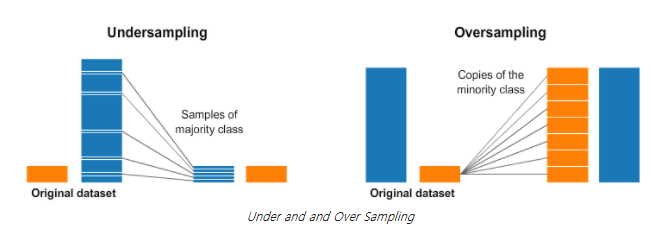

예를 들어, 위 그림에서 파란색 데이터가 주황색 데이터에비해 양이 현저히 적다. 이 경우 두 가지 방법 - Undersampling, Oversampling 으로 샘플링을 할 수 있다. 

Undersampling 은 Majority class (파란색 데이터) 의 일부만을 선택하고, Minority class (주황색 데이터) 는 최대한 많은 데이터를 사용하는 방법이다. 이 때 Undersampling 된 파란색 데이터가 원본 데이터와 비교해 대표성이 있어야한다. Oversampling 은 Minority class 의 복사본을 만들어, Majority class 의 수만큼 데이터를 만들어주는 것이다. 똑같은 데이터를 그대로 복사하는 것이기 때문에 새로운 데이터는 기존 데이터와 같은 성질을 갖게된다.  



    
   

  - Algorithm Over Sampling (알고리즘을 통한 오버샘플링)

    1) SMOTE(synthetic minority over-sampling technique): over sampling에서 많이 쓰이는 기법
    - 먼저 소수 클래스에서 각각의 샘플들의 knn(k-nearest neighbors)을 찾는다.
    - 그리고 그 이웃들 사이에 선을 그어 무작위 점을 생성한다.
    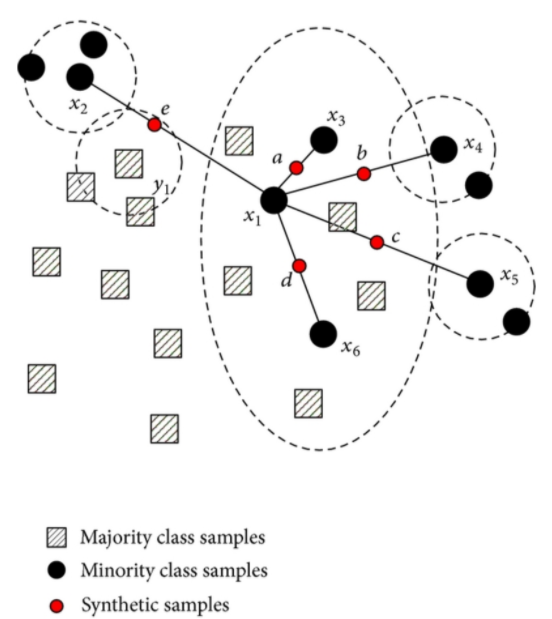

-> SMOTE의 변형기법: BLSMOTE(borderline SMOTE), DBSMOTE(dbscan SMOTE)

  - hybrid resampling: over & under sampling를 결합하여 사용하는 방법

**2) cost-sensitive learning**: 

class의 오분류(잘못된 분류)에 대한 cost의 가중치를 조절하여 학습하는 방법, 

Cost sensitive learning은 데이터 자체를 생성하진 않는다. 다만 머신러닝을 학습할 때 소수의 클래스에 대한 cost값에 가중치를 더 많이 주어 균형 잡힌 학습이 가능하게 하는 방법이다.

->resampling method는 학습전 데이터 단계에서 완화시키는 방법, cost-sensitive learning은 학습알고리즘 단계에서 완화시키는 방법이다. resampling method이 많이 사용된다

## CASE 적용
  - Under sampling
  - SMOTE

1) 전체 데이터 : 총 1000개 
  -> Good : 700개 , Bad : 300개

2) train set : 700개 
  -> Good : 490개, Bad : 210개

3) test set : 300개
  -> Good : 210개, Bad : 90개

- train set under sampling

In [ ]:
bad_indices=np.array(train_df[train_df.goodbad==1].index)
no_records_bad=len(bad_indices)
print(no_records_bad)

210


In [ ]:
normal_indices=train_df[train_df.goodbad==0].index
random_normal_indices=np.random.choice(normal_indices,no_records_bad,replace=False)
random_normal_indices=np.array(random_normal_indices)
print(len(random_normal_indices))

210


In [ ]:
under_sample_indices=np.concatenate([bad_indices,random_normal_indices])
print(len(under_sample_indices))

420


In [ ]:
under_sample_data=train_df.iloc[under_sample_indices,:]
under_sample_data.head()

,goodbad,checking,duration,history,purpose,amount,savings,employed,installp,martial,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign
3,1,1,4,5,7,4,1,3,4,3,1,3,4,2,1,2,1,3,1,2,1
12,1,1,2,3,3,4,1,5,4,3,1,4,4,5,3,3,1,4,1,2,1
15,1,2,3,5,1,1,1,5,4,3,1,4,3,4,1,2,1,3,2,2,1
16,1,1,4,3,1,3,1,2,4,2,1,4,3,3,3,2,1,3,1,2,1
25,1,1,3,3,1,3,1,2,4,2,1,1,2,2,3,2,1,3,1,1,1


In [ ]:
X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='goodbad']
y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='goodbad']

- test set under sampling

In [ ]:
bad_indices1=np.array(test_df[test_df.goodbad==1].index)
no_records_bad1=len(bad_indices1)
print(no_records_bad1)

90


In [ ]:
normal_indices1=test_df[test_df.goodbad==0].index
random_normal_indices1=np.random.choice(normal_indices1,no_records_bad1,replace=False)
random_normal_indices1=np.array(random_normal_indices1)
print(len(random_normal_indices1))

90


In [ ]:
under_sample_indices1=np.concatenate([bad_indices1,random_normal_indices1])
print(len(under_sample_indices1))

180


In [ ]:
under_sample_data1=test_df.iloc[under_sample_indices1,:]
under_sample_data1.head()

,goodbad,checking,duration,history,purpose,amount,savings,employed,installp,martial,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign
1,1,1,3,3,1,1,1,2,4,2,1,3,3,1,3,1,1,3,1,2,1
12,1,4,3,3,3,2,1,2,4,4,2,1,2,5,3,2,1,2,2,1,1
15,1,2,3,3,4,3,1,2,1,4,1,1,2,1,3,2,1,3,1,2,1
18,1,4,3,3,9,4,4,3,2,3,1,3,2,5,3,2,3,4,1,2,1
23,1,1,2,3,1,3,1,3,3,2,1,2,2,3,3,2,1,3,1,2,1


In [ ]:
X1_undersample=under_sample_data1.iloc[:,under_sample_data1.columns!='goodbad']
y1_undersample=under_sample_data1.iloc[:,under_sample_data1.columns=='goodbad']

In [ ]:
#원핫인코딩_train_df
dataset_x = X_undersample.values
X_undersample = dataset_x[:,0:21].astype('float')  
#y_obj = dataset[:,0]   #target -> y_undersample

e=LabelEncoder()
e.fit(y_undersample)
y_sampling=e.transform(y_undersample)
y_encoded_samp=tf.keras.utils.to_categorical(y_sampling)
y_encoded_samp[:21]



#원핫인코딩_test_df
dataset_x1 = X1_undersample.values
X_test = dataset_x1[:,0:21].astype('float')  
#y_obj1 = dataset1[:,0]   #target -> y1_undersample

e1=LabelEncoder()
e1.fit(y1_undersample)
y1_samp=e1.transform(y1_undersample)
y_test=tf.keras.utils.to_categorical(y1_samp)
y_test[:21]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_undersample, y_encoded_samp, test_size=0.8, random_state=0)

In [ ]:
model = Sequential()

# 옵티마이저는 경사하강법 sgd를 사용
sgd = optimizers.SGD(lr=0.03, decay=0, momentum=0.9, nesterov=False)
model.add(Dense(18, input_dim=train_X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy','mae', 'mse'])

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=5)

Epoch 1/30
17/17 [==============================] - 1s 17ms/step - loss: 0.7004 - accuracy: 0.7024 - mae: 0.3473 - mse: 0.2135 - val_loss: 0.6486 - val_accuracy: 0.6964 - val_mae: 0.3522 - val_mse: 0.2105
Epoch 2/30
17/17 [==============================] - 0s 11ms/step - loss: 0.6332 - accuracy: 0.7143 - mae: 0.3432 - mse: 0.2047 - val_loss: 0.7383 - val_accuracy: 0.6548 - val_mae: 0.3751 - val_mse: 0.2378
Epoch 3/30
17/17 [==============================] - 0s 10ms/step - loss: 0.6287 - accuracy: 0.6667 - mae: 0.3585 - mse: 0.2061 - val_loss: 0.7108 - val_accuracy: 0.6488 - val_mae: 0.3788 - val_mse: 0.2334
Epoch 4/30
17/17 [==============================] - 0s 11ms/step - loss: 0.6214 - accuracy: 0.7143 - mae: 0.3570 - mse: 0.2026 - val_loss: 0.6498 - val_accuracy: 0.6548 - val_mae: 0.3844 - val_mse: 0.2210
Epoch 5/30
17/17 [==============================] - 0s 10ms/step - loss: 0.6306 - accuracy: 0.6310 - mae: 0.3618 - mse: 0.2125 - val_loss: 0.6271 - val_accuracy: 0.6786 - val_mae: 

In [ ]:
Y_PRED = model.predict(X_test)
score = model.evaluate(X_test, y_test) 

6/6 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6778 - mae: 0.3934 - mse: 0.2208


In [ ]:
print("정확도 결과는 : {} %".format(np.round(model.evaluate(X_test, y_test)[1],3)))
score = pd.DataFrame(score, index = model.metrics_names).T
history = pd.DataFrame(history.history)
display(score.style.hide_index())

6/6 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6778 - mae: 0.3934 - mse: 0.2208
정확도 결과는 : 0.678 %


loss,accuracy,mae,mse
0.661424,0.677778,0.393402,0.220782


In [ ]:
rounded_pred=np.argmax(Y_PRED, axis=1)
rounded_pred[1]

rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

1

In [ ]:
# confusion matrix (분류 표를 나타낸 행렬)

cfmat = confusion_matrix(rounded_labels, rounded_pred)
print(cfmat)
print(classification_report(rounded_labels, rounded_pred))
print()

[[66 24]
 [34 56]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.69        90
           1       0.70      0.62      0.66        90

    accuracy                           0.68       180
   macro avg       0.68      0.68      0.68       180
weighted avg       0.68      0.68      0.68       180




precision(정밀도) : 0(정상)이라고 예측한 데이터의 66%만 실제로 정상이었고 1(부도)이라고 예측한 데이터의 70%만 실제로 부도이었음을 알 수 있다. 

recall(재현율) : 또한 실제 0(정상)인 데이터 중의 73%만 정상으로 판별되었고 실제 1(부도)인 데이터 중의 62%만 1(부도)로 판별되었음을 알 수 있다.